In [1]:
pip install lime

     |████████████████████████████████| 276kB 4.5MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=87c31ae8959e732482fc1bc5978bea97e5f36189278bdf86134330a0106713fe
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [2]:
from google.colab import drive
import lime
import sklearn
import sklearn.ensemble
import sklearn.metrics
import pandas as pd
import numpy as np

In [3]:
#I used the Youtube01 to do this task. You can change the name for the csv file to see the result with the other file.
df=pd.read_csv('/content/Youtube01-Psy.csv')

df.head(5)
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# This is to define the features and labels for the CountVectorizer
X = df.CONTENT

y = df.CLASS
print(X.shape)
print(y.shape)
class_names = ['notSpam', 'Spam']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2)


FileNotFoundError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector =CountVectorizer(analyzer='word',token_pattern=r'\w+')
vector.fit(list(X))
X_converted=vector.fit_transform(X)
X_train_converted = vector.transform(X_train)
X_test_converted=vector.transform(X_test)



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
#rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train_converted, y_train)
y_pred = rf.predict(X_test_converted)

In [ ]:
import sklearn 
print(sklearn.metrics.classification_report(np.rint(y_pred),y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        38
         1.0       0.91      1.00      0.96        32

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70



#***Expression using lime***

In [ ]:
from sklearn.pipeline import make_pipeline
c = make_pipeline(vector, rf)

In [ ]:
print(c.predict_proba([X_test[0]]))

[[0.15 0.85]]


In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
idx = 7
exp = explainer.explain_instance(X[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(Spam) =', c.predict_proba([X[idx]])[0, 1])
print(X[idx])
if(c.predict_proba([X[idx]])[0, 1] > 0.5):
    print('True class: %s' % class_names[1])
else:
    print('True class: %s' % class_names[0])


Document id: 7
Probability(Spam) = 0.036
i turned it on mute as soon is i came on i just wanted to check the  views...﻿
True class: Spam


In [ ]:
exp.as_list()

[('views', -0.09361295303083354),
 ('the', -0.06391718097585584),
 ('is', -0.03189508511834775),
 ('on', 0.027312715335474823),
 ('check', 0.025248175097999166),
 ('i', 0.025068630928239074)]

In [ ]:
print('Original prediction:', rf.predict_proba(X_converted[idx])[0, 1])
tmp = X_converted[idx].copy()
tmp[0, vector.vocabulary_['views']] = 0
tmp[0, vector.vocabulary_['the']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0, 1])
print('Difference:', rf.predict_proba(tmp)[0, 1] - rf.predict_proba(X_converted[idx])[0, 1])

Original prediction: 0.036
Prediction removing some features: 0.196
Difference: 0.16


# ***Visualizing Explanations***

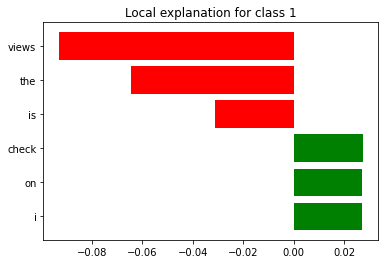

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()